<center>
<img src="images/logo.png" alt="logo" style="width: 200px;"/>
<br>

<center> <font size=6 style='bold font-family: var(--Abel);'>Bahir Dar University </font> </center>
<br>
<center> <font size=6 style='bold font-family:--Abel;'>Bahir Dar Institute of Technology</font> </center>
<br>
<br>
<br>

<center> <font size=6 style='bold' color='blue'>Python Basics</font> </center>

<br>
<br>

<center> <font size=6 style='bold font-family:Abel'>Eyaya Birara, Eneyew (eyayab21@gmail.com) </font> </center>
<br>

<center> <font size=6 style='bold font-family:Abel'>March 29 - April 08, 2021</font> </center>
<br>
<center> <font size=6 style='bold font-family:Abel'>Organized By:<font size=6 style='bold font-family:Abel' color='blue'> CIMPA and AMU</font> </font> </center>
</center>

# Symbolic Computation

Symbolic computing is an entirely different paradigm in computing compared to the
numerical array-based computing introduced in the previous section.

In the scientific Python environment, the main module for symbolic computing is
__SymPy__ (__Symbolic Python__). SymPy is entirely written in Python and provides tools for a
wide range of analytical and symbolic problems. In this chapter we look in detail into
how SymPy can be used for symbolic computing with Python.

__SymPy__ The Symbolic Python (SymPy) library aims to provide a full-featured
computer algebra system (__CAS__). In contrast to many other CASs, SymPy is
primarily a library, rather than a full environment. This makes SymPy well suited for
integration in applications and computations that also use other Python libraries.

In [2]:
import sympy as spy

First call the __sympy.init_printing__ function, which configures SymPy's printing system to display nicely formatted renditions of mathematical expressions, as we will see examples of such later in this chapter. Therefore, t get nice-looking $\LaTeX$ formatted output run:

In [5]:
spy.init_printing()

__Note__: NumPy and SymPy, as well as many other libraries, provide many functions and variables with the same name. But these symbols are rarely interchangeable. For example, *numpy.pi* is a numerical approximation of the
mathematical symbol $\pi$, while *sympy.pi* is a symbolic representation of $\pi$. It is therefore important to not mix them up and use, for instance, *numpy.pi* in place of *sympy.pi* when doing symbolic computations, or vice versa. 

The same holds true for many fundamental mathematical functions, such as for example *numpy.sin* vs. *sympy.sin*. Therefore, when using more than one package in computing with Python, it is important to consistently use namespaces.

In [6]:
import numpy as np

In [7]:
np.pi

In [9]:
spy.pi

## Symbols

A core feature in SymPy is to represent mathematical symbols as Python objects. In the SymPy library, for example, the class sympy.Symbol can be used for this purpose.

Among the first steps in setting up and analyzing a problem with SymPy is to __create symbols__ for the various mathematical variables and quantities that are required to describe the problem.

The symbol name is a __string__, which optionally can contain LaTeX-like markup to make the symbol name display well in, for example, IPython’s rich display system.

Symbols can be created in a few different ways in SymPy, for example, using __sympy.Symbol__, __sympy.symbols__, and __sympy.var__.

In [10]:
x = spy.Symbol("x")

In [11]:
y = x**2 + 2*x
y

The variable $x$ now represents an abstract mathematical symbol $x$ of which very little information is known by default. At this point, $x$ could represent, for example, a real number, an integer, a complex number, a function, as well as a large number of other possibilities.

In many cases it is sufficient to represent a mathematical symbol with this abstract, unspecified Symbol object, but sometimes it is necessary to give the SymPy library more hints about exactly what type of symbol a Symbol object is representing.

In [15]:
x.is_real

In [13]:
y = spy.Symbol("y", real=True)

In [14]:
y.is_real

True

If, on the other hand, we were to use is_real to query the previously defined symbol
$x$, which was not explicitly specified to real, and therefore can represent both real and
nonreal variables, we get None as a result:

In [72]:
x.is_real is None

True

In [16]:
spy.Symbol("z", imaginary=True).is_real

False

<div class="alert alert-block alert-info">

Assumption Keyword Arguments | Attributes | Description 
:-|:-|:-|
real, imaginary | is_real, is_imaginary | Specify that a symbol represents a real or imaginary number. 
positive, negative |  is_positive, is_negative| Specify that a symbol is positive or negative.
integer |is_integer |The symbol represents an integer.
odd, even | is_odd, is_even | The symbol represents an odd or even integer.
prime | is_prime | The symbol is a prime number and therefore also an integer.
finite, infinite | is_finite, is_infinite | The symbol represents a quantity that is finite or infinite.

</div>

In [24]:
x = spy.Symbol("x")
y = spy.Symbol("y", positive=False)

In [25]:
spy.sqrt(x**2)

In [26]:
spy.sqrt(y**2)

When working with mathematical symbols that represent integers, rather than say real numbers, it is also useful to explicitly specify this when creating the corresponding SymPy symbols, using, for example, the __integer=True__, or __even=True__ or __odd=True__, if applicable. This may also allow SymPy to analytically simplify certain expressions and function evaluations, such as in the following example:

In [27]:
n1 = spy.Symbol("n")
n2 = spy.Symbol("n", integer=True)
n3 = spy.Symbol("n", odd=True)

In [28]:
spy.cos

cos

In [80]:
spy.cos(n1*spy.pi)

In [81]:
spy.cos(n2*spy.pi)

In [29]:
spy.cos(n3*spy.pi)

To formulate a nontrivial mathematical problem, it is often necessary to define a large number of symbols. Using Symbol to specify each symbol one-by-one may become tedious, and for convenience, SymPy contains a function sympy.symbols for creating multiple symbols in one function call.

In [30]:
a,b,c = spy.symbols("a,b,c", negative=True)
d,e,f = spy.symbols("d,e,f", positive=True)

### Numbers
### Integers

In [31]:
i = spy.Integer(10)

In [32]:
type(i)

sympy.core.numbers.Integer

In [33]:
i.is_Integer, i.is_real, i.is_odd

(True, True, False)

In [34]:
f = spy.Float(2.3)

In [35]:
f.is_Integer, f.is_real, f.is_odd

(False, True, False)

### Float

In [37]:
"%.205f" % 0.3  # create a string representation with 25 decimals

'0.2999999999999999888977697537484345957636833190917968750000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'

In [49]:
spy.Float(0.3, 17)

In [43]:
spy.Float('0.3', 256)

### Rational 

A rational number is a fraction $p/q$ of two integers, the numerator $p$ and the denominator $q$. SymPy represents this type of numbers using the sympy.Rational class. Rational numbers can be created explicitly, using sympy.Rational and the numerator and denominator as arguments:

In [50]:
spy.Rational(11, 13)

or they can be a result of a simplification carried out by SymPy. In either case, arithmetic operations between rational and integers remain rational.

In [51]:
r1 = spy.Rational(2, 3)
r2 = spy.Rational(4, 5)

In [52]:
r1*r2

In [53]:
r1/r2

## Constants and Special Symbols

SymPy provides predefined symbols for various mathematical constants and special objects, such as the imaginary unit i and infinity. These are summarized in the following 
Table, together with their corresponding symbols in SymPy. Note in particular that the imaginary unit is written as I in SymPy.

<div class="alert alert-block alert-info">

Mathematical Symbol | SymPy Symbol | Description 
:-|:-|:-|
$\pi$ | spy.pi | Ratio of the circumference to the diameter of a circle.
$e$|  spy.e| The base of the natural logarithm, $e = exp (1)$.
$\gamma$ |spy.EulerGamma |Euler's constant.
$i$ | spy.I The  | imaginary unit.
$\infty$ | spy.oo | Infinity
</div>

In [54]:
spy.oo

## Functions

In [55]:
x, y, z = spy.symbols("x, y, z")
f = spy.Function("f")
type(f)

sympy.core.function.UndefinedFunction

In [56]:
f(x)

In [57]:
g = spy.Function("g")(x, y, z)

In [58]:
g

In [59]:
g.free_symbols

Naturally, SymPy has built-in functions for many standard mathematical functions that are available in the global SymPy namespace (see the module documentation for sympy.functions.elementary, sympy.functions.combinatorial, and sympy. functions.special and their subpackages for comprehensive lists of the numerous functions that are available, using the Python help function). For example, the SymPy function for the sine function is available as sympy.sin (with our import convention). Note that this is not a function in the Python sense of the word (it is, in fact, a subclass of  sympy.Function), and it represents an unevaluated sin function that can be applied to a numerical value, a symbol, or an expression.

In [62]:
spy.sin

sin

In [64]:
spy.functions.elementary.trigonometric.sin

sin

In [65]:
spy.sin(x)

In [70]:
spy.sin(spy.pi *1.5)

When applied to an abstract symbol, such as $x$, the sin function remains unevaluated, but when possible it is evaluated to a numerical value, for example, when applied to a number or, in some cases, when applied to expressions with certain properties, as in the following example:

In [67]:
n = spy.Symbol("n", integer=True)

In [71]:
spy.simplify(spy.sin(np.pi*n))

A third type of function in SymPy is lambda functions, or anonymous functions, which do not have names associated with them, but do have a specific function body that can be evaluated. Lambda functions can be created with sympy.Lambda:

In [76]:
h = spy.Lambda(x, 2*x**2+3*x)

In [77]:
h

In [78]:
h(0)

In [81]:
h(1+x)

In [80]:
spy.simplify(h(1 + x))

## Expressions
The various symbols inttroduced in the previous sections are the fundamental building
blocks required to express mathematical expressions. In SymPy, mathematical
expressions are represented as trees where leaves are symbols and nodes are class
instances that represent mathematical operations. Examples of these classes are Add,
Mul, and Pow for basic arithmetic operators and Sum, Product, Integral, and Derivative
for analytical mathematical operations. In addition, there are many other classes for
mathematical operations, which we will see more examples of later in this chapter.
Consider, for example, the mathematical expression $1+2^ 2 +3x^3$ . To represent this in
SymPy, we only need to create the symbol x and then write the expression as Python

In [82]:
x = spy.Symbol("x")

In [83]:
expr = 1 + 3*x**3- 2*x**2 

In [84]:
expr

In [85]:
expr.args

In [86]:
expr.args[1]

In [120]:
expr.args[1].args[1]

In [122]:
expr.args[1].args[1].args[1]

In [123]:
expr.args[1].args[1].args[0].args

## Manipulating Expressions

### Simplification

The most desirable manipulation of a mathematical expression is to simplify it. This is perhaps and also the most ambiguous operation, since it is nontrivial to determine algorithmically if one expression appears simpler than another to a human being, and in general it is also not obvious which methods should be employed to arrive at a simpler expression. Nonetheless, black-box simplification is an important part of any CAS, and SymPy includes the function sympy.simplify that attempts to simplify a given expression using a variety of methods and approaches. The simplification function can also be invoked through the method simplify, as illustrated in the following example.

In [87]:
expr = 2 *(x**2 - x) - x * (x + 1)

In [88]:
expr

In [89]:
spy.simplify(expr)

In [90]:
expr 

Note that here both sympy.simplify(expr) and expr.simplify() return new expression trees and leave the expression expr untouched, as mentioned earlier. In this example, the expression expr can be simplified by expanding the products, canceling terms, and then factoring the expression again. In general, sympy.simplify will attempt a variety of different strategies and will also simplify, for example, trigonometric and power expressions, as exemplified here:

In [91]:
expr = 2 * spy.cos(x) * spy.sin(x)

In [92]:
expr

In [93]:
spy.simplify(expr)

In [94]:
expr = spy.exp(x) * spy.exp(y)

In [95]:
expr

In [96]:
spy.simplify(expr)

Each specific type of simplification can also be carried out with more specialized functions, such as sympy.trigsimp and sympy.powsimp, for trigonometric and power simplifications, respectively. These functions only perform the simplification that their names indicate and leave other parts of an expression in its original form. A summary of simplification functions is given in the following Table. When the exact simplification steps are known, it is in general better to rely on the more specific simplification functions,
since their actions are more well defined and less likely to change in future versions of SymPy. The sympy.simplify function, on the other hand, relies on heuristic approaches that may change in the future and, as a consequence, produce different results for a particular input expression.

<div class="alert alert-block alert-info">

Function| Description 
:-|:-|
spy.simplify |Attempt various methods and approaches to obtain a simpler form of a given expression.
spy.trigsimp|Attempt to simplify an expression using trigonometric identities.
spy.powsimp |Attempt to simplify an expression using laws of powers.
spy.compsimp|Simplify combinatorial expressions.
spy.ratsimp | Simplify an expression by writing on a common denominator.
</div>

### Exapnd
When the black-box simplification provided by sympy.simplify does not produce satisfying results, it is often possible to make progress by manually guiding SymPy using more specific algebraic operations. An important tool in this process is to expand expression in various ways. The function sympy.expand performs a variety of expansions, depending on the values of optional keyword arguments. By default the function distributes products over additions, into a fully expanded expression. For example, a product of the type $(x+1)(x+2)$ can be expanded to $x^2 +3x+2$ using

In [97]:
expr = (x + 1) * (x + 2)

In [98]:
expr

In [99]:
exp1 = spy.expand(expr)

In [100]:
exp1

In [101]:
spy.factor(exp1)

Some of the available keyword arguments are mul=True for expanding products (as in the preceding example), __trig=True__ for trigonometric expansions,

In [104]:
spy.sin(x + y).expand(trig=True)

__log=True__ for expanding logarithms,

In [105]:
a, b = spy.symbols("a, b", positive=True)

In [106]:
spy.log?

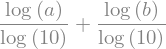

In [108]:
spy.log(a * b, 10).expand(log=True)

__complex=True__ for separating real and imaginary parts of an expression,

In [111]:
spy.exp(spy.I*a + b).expand(complex=True)

and __power_base=True__ and __power_exp=True__ for expanding the base and the exponent

In [163]:
spy.expand((a * b)**x, power_base=True)

In [164]:
spy.exp((a-b)*x).expand(power_exp=True)

Calling the sympy.expand function with these keyword arguments set to True is equivalent to calling the more specific functions __sympy.expand_mul__, __sympy.expand_trig__, __sympy.expand_log__, __sympy.expand_complex__, __sympy.expand_power_base__, and __sympy.expand_power_exp__, respectively, but an advantage of the __sympy.expand__ function is that several types of expansions can be performed in a single function call.

### Substitutions
The previous sections have been concerned with rewriting expressions using various mathematical identities. Another frequently used form of manipulation of mathematical expressions is substitutions of symbols or  subexpressions within an expression.

In the most basic use of subs, the method is called in an expression, and the symbol or expression that is to be replaced ($x$) is given as the first argument, and the new symbol or the expression ($y$) is given as the second argument. The result is that all occurrences of $x$ in the expression are replaced with $y$:

In [114]:
x = spy.Symbol("x", Integer=True)
y = spy.Symbol("y", real=True)

In [115]:
(x + y).subs(y, x)

In [116]:
spy.sin(x * spy.exp(x)).subs({x:y, spy.sin:spy.log, spy.exp:h})

Instead of chaining multiple subs calls when multiple substitutions are required, we can alternatively pass a dictionary as the first and only argument to subs that maps old symbols or expressions to new symbols or expressions:

In [117]:
spy.sin(x * z).subs({z: spy.exp(y), x: y, spy.sin: spy.cos})

A typical application of the subs method is to substitute numerical values in place of symbols, for numerical evaluation (see the following section for more details). A convenient way of doing this is to define a dictionary that translates the symbols to numerical values and pass this dictionary as the argument to the subs method. For example, consider

In [121]:
expr = x * y + z**2 *x

In [122]:
expr

In [123]:
values = {x: 1.25, y: 0.4, z: 3.2}

In [124]:
expr.subs(values)

### Numerical Evaluation

Even when working with symbolic mathematics, it is almost invariably sooner or later required to evaluate the symbolic expressions numerically, for example, when producing plots or concrete numerical results. A SymPy expression can be evaluated using either the sympy.N function or the evalf method of SymPy expression  instances:

In [128]:
spy.N(1 + spy.pi,4)

In [130]:
x = spy.N(np.pi, 59)
x

In [129]:
u ="3.141592653589793115997963468544185161590576171875"
len(u)

In [131]:
y = str(x)
print(y)
len(y)

3.1415926535897931159979634685441851615905761718750000000000


In [132]:
(x + spy.pi).evalf(3)

When we need to evaluate an expression numerically for a range of input values, we could in principle loop over the values and perform successive evalf calls, for example

In [167]:
x = spy.Symbol("x")
y = spy.Symbol("y")
expr = spy.sin(spy.pi * x * spy.exp(x))
expr

In [168]:
[expr.subs(x, xx).evalf(3) for xx in range(0, 10)]

In [169]:
expr.subs(x, 2).evalf(3)

In [170]:
[ xx**2 for xx in range(10)]

However, this method is rather slow, and SymPy provides a more efficient method
for doing this operation using the function __sympy.lambdify__. This function takes a set of
free symbols and an expression as arguments and generates a function that efficiently
evaluates the numerical value of the expression. The produced function takes the same
number of arguments as the number of free symbols passed as the first argument to
__sympy.lambdify__.

In [171]:
expr

In [172]:
expr.subs(x,1)

In [173]:
expr_func = spy.lambdify(x, expr)

In [174]:
x1 = np.array([xx**2 for xx in range(0,10)])

In [175]:
expr_func(x1)

array([ 0.        ,  0.77394269,  0.94361635, -0.69512687,  0.85773014,
        0.89512419, -0.80046751, -0.02519169, -0.59962763,  0.50768668])

However, SymPy is also able to generate functions that are NumPy-array aware: by passing the optional argument _'numpy'_ as the third argument to __sympy.lambdify__ SymPy creates a vectorized function that accepts NumPy arrays as input. This is in general an efficient way to numerically evaluate symbolic expressions 2 for a large number of input parameters. The following code exemplifies how the SymPy expression __expr__ is converted into a NumPy-array aware vectorized function that can be
efficiently evaluated:

In [162]:
expr_func = spy.lambdify(x, expr, 'numpy')

In [163]:
xvalues = np.arange(0, 10)

In [164]:
expr_func(xvalues)

array([ 0.        ,  0.77394269,  0.64198244,  0.72163867,  0.94361635,
        0.20523391,  0.97398794,  0.97734066, -0.87034418, -0.69512687])

This method for generating data from SymPy expressions is useful for plotting and many other data-oriented applications.

## Calculus

In [178]:
f = spy.Function('f')(x)

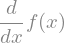

In [179]:
spy.diff(f, x)               # equivalent to f.diff(x)

To represent higher-order derivatives, all we need to do is to repeat the symbol $x$ in the argument list in the call to __sympy.diff__ or, equivalently, specify an integer as an argument following a symbol, which defines the number of times the expression should be derived with respect to that symbol:

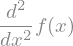

In [181]:
spy.diff(f, x,2 )

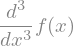

In [182]:
spy.diff(f, x, 3)      # equivalent to sympy.diff(f, x, x, x)

This method is readily extended to multivariate functions:

In [183]:
g = spy.Function('g')(x, y)

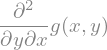

In [184]:
g.diff(x, y)     # equivalent to sympy.diff(g, x, y)

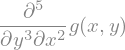

In [187]:
g.diff(x,2,y,3)    # equivalent to sympy.diff(g, x, x, x, y, y)

In [188]:
expr = x**4 + x**3 + x**2 + x + 1

In [189]:
expr.diff(x)

In [190]:
expr.diff(x, x)

In [192]:
expr = (x + 1)**3 * y ** 2 * (z - 1)

In [193]:
expr

In [235]:
expr.diff(x, y, z)

as well as trigonometric and other more complicated mathematical expressions:

In [194]:
expr = spy.sin(x * y) * spy.cos(x / 2)

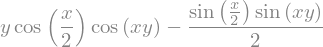

In [195]:
expr.diff(x)

In [196]:
expr = spy.functions.special.polynomials.hermite(x, 0)

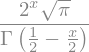

In [197]:
expr

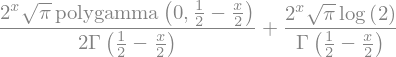

In [200]:
expr.diff(x).doit()

In [201]:
d = spy.Derivative(spy.exp(spy.cos(x)), x)

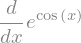

In [202]:
d

In [204]:
d.doit()

## Integrals

In [205]:
a, b, x, y = spy.symbols("a, b, x, y")

In [206]:
f = spy.Function("f")(x)

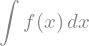

In [207]:
spy.integrate(f)

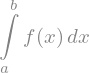

In [208]:
spy.integrate(f, (x, a, b))

When these methods are applied to explicit functions, the integrals are evaluated
accordingly:

In [209]:
spy.integrate(spy.sin(x))

In [210]:
spy.integrate(spy.sin(x), (x, a, b))

Definite integrals can also include limits that extend from negative infinity, and/or to
positive infinite, using SymPy’s symbol for infinity oo:

In [211]:
spy.integrate(spy.exp(-x**2), (x, 0, spy.oo))

In [212]:
a, b, c = spy.symbols("a, b, c", positive=True)

In [213]:
spy.integrate(a * spy.exp(-((x-b)/c)**2), (x, -spy.oo, spy.oo))

Multivariable expressions can also be integrated with sympy.integrate. In the case of an indefinite integral of a multivariable expression, the integration variable has to be specified explicitly:

In [214]:
expr = spy.sin(x*spy.exp(y))
expr

In [215]:
spy.integrate(expr, x)

In [216]:
expr = (x + y)**2

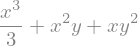

In [218]:
spy.integrate(expr, x)

By passing more than one symbol, or multiple tuples that contain symbols and their integration limits, we can carry out multiple integrations:

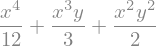

In [219]:
spy.integrate(expr, x, x)

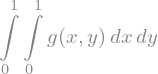

In [222]:
spy.integrate(g, (x, 0, 1), (y, 0, 1))

## Series
Series expansions are an important tool in many disciplines in computing. With a series expansion, an arbitrary function can be written as a polynomial, with coefficients given by the derivatives of the function at the point around which the series expansion is made. By truncating the series expansion at some order n, the nth order approximation of the function is obtained. In SymPy, the series expansion of a function or an expression
can be computed using the function sympy.series or the series method available in SymPy expression instances. The first argument to sympy.series is a function or expression that is to be expanded, followed by a symbol with respect to which the expansion is to be computed (it can be omitted for single-variable expressions and
function). In addition, it is also possible to request a particular point around which the series expansions are to be performed (using the x0 keyword argument, with default x0=0), specifying the order of the expansion (using the n keyword argument, with default n=6) and specifying the direction from which the series is computed, i.e., from below or above x0 (using the dir keyword argument, which defaults to dir='+').

For an undefined function f(x), the expansion up to sixth order around x0=0 is computed using

In [7]:
x, y ,h= spy.symbols("x, y,h")

In [8]:
f = spy.Function("f")(x)

In [9]:
spy.series(f, x,h)

f(h) + (-h + x)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, h) + (-h + x)**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, h)/2 + (-h + x)**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, h)/6 + (-h + x)**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, h)/24 + (-h + x)**5*Subs(Derivative(f(_xi_1), (_xi_1, 5)), _xi_1, h)/120 + O((-h + x)**6, (x, h))

To change the point around which the function is expanded, we specify the $x_0$ argument as in the following example:

In [235]:
x0 = spy.Symbol("{x_0}")

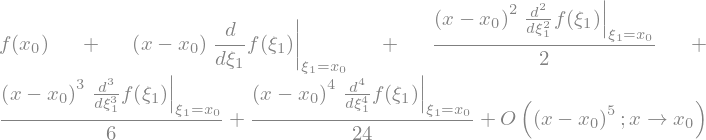

In [237]:
f.series(x, x0, n=5)

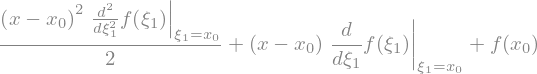

In [239]:
f.series(x, x0, n=3).removeO()

While the expansions shown in the preceding text were computed for an unspecified function $f(x)$, we can naturally also compute the series expansions of specific functions and expressions, and in those cases we obtain specific evaluated results. For example, we can easily generate the well-known expansions of many standard mathematical functions:

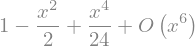

In [240]:
spy.cos(x).series()

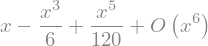

In [241]:
spy.sin(x).series()

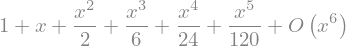

In [242]:
spy.exp(x).series()

In [243]:
(1/(1+x)).series()

as well as arbitrary expressions of symbols and functions, which in general can also be multivariable functions:

In [244]:
expr = spy.cos(x) / (1 + spy.sin(x * y))

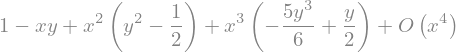

In [245]:
expr.series(x, n=4)

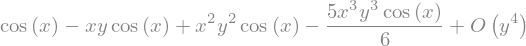

In [276]:
expr.series(y, n=4)

## Limits

In [252]:
spy.limit(spy.sin(x) / x, x, 0)

In [253]:
f = spy.Function('f')

In [254]:
x, h = spy.symbols("x, h")

In [249]:
diff_limit = (f(x + h) - f(x))/h

In [250]:
g = spy.Function('g')
g = 1/x

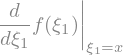

In [256]:
spy.limit(diff_limit.subs(f, g), h, 0)

In [257]:
spy.limit(diff_limit.subs(f, spy.sin), h, 0)

A more practical example of using limits is to find the asymptotic behavior as a function, for example, as its dependent variable approaches infinity. As an example, consider the function $f(x) = (x 2 - 3x)/(2x - 2)$, and suppose we are interested in the large-x dependence of this function. It will be in the form $f (x) \rightarrow px+q$, and we can compute $p$ and $q$ using sympy.limit as in the following:

In [285]:
expr = (x**2 - 3*x) / (2*x - 2)

In [286]:
p = spy.limit(expr/x, x, spy.oo)

In [287]:
q = spy.limit(expr - p*x, x, spy.oo)

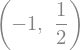

In [288]:
q,p

In [ ]:
#Thus, the asymptotic behavior of $f(x)$ as $x$ becomes large is the linear function $f(x) \rightarrow \frac{1}{2}x -1 $

## Sums and products
Sums and products can be symbolically represented using the SymPy classes sympy. Sum and sympy.Product. They both take an expression as their first argument, and as a second argument, they take a tuple of the form $(n, n_1, n_2)$, where $n$ is a symbol and $n_1$ and $n_2$ are the lower and upper limits for the symbol $n$, in the sum or product, respectively. After sympy.Sum or sympy.Product objects have been created, they can be evaluated using the doit method:

In [258]:
n = spy.symbols("n", integer=True)

In [259]:
x = spy.Sum(1/(n), (n, 1, spy.oo))

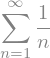

In [260]:
x

In [261]:
x.doit()

In [262]:
x = spy.Product(n, (n, 1, 7))

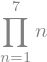

In [263]:
x

In [264]:
x.doit()

Note that the sum in the previous example was specified with an upper limit of infinity. It is therefore clear that this sum was not evaluated by explicit summation, but
was rather computed analytically. SymPy can evaluate many summations of this type, including when the summand contains symbolic variables other than the summation
index, such as in the following example:

In [130]:
x = spy.Symbol("x")

In [132]:
spy.Sum((x)**n/(spy.factorial(n)), (n, 1, spy.oo)).doit().simplify()

## Equations

In [265]:
x = spy.Symbol("x")

In [266]:
spy.solve(x**2 + 2*x - 3)

In [138]:
a, b, c = spy.symbols("a, b, c")

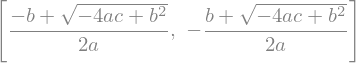

In [267]:
spy.solve(a * x**2 + b * x + c, x)

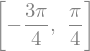

In [268]:
spy.solve(spy.sin(x) - spy.cos(x), x)

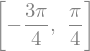

In [269]:
spy.solve(spy.sin(x) - spy.cos(x), x)

### System of equations

In [270]:
eq1 = x + 2 * y -1
eq2 = x - y + 1

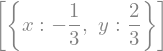

In [271]:
spy.solve([eq1, eq2], [x, y], dict=True)

In [272]:
eq1 = x**2 - y
eq2 = y**2 - x

In [273]:
sols = spy.solve([eq1, eq2], [x, y], dict=True)

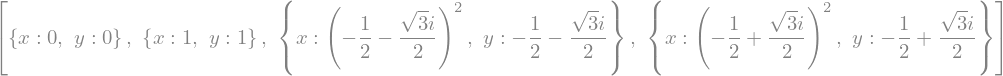

In [274]:
sols

## Linear Algebra